In [76]:
import csv

In [77]:
import numpy as np

In [78]:
import sklearn

In [79]:
import matplotlib.pyplot as plt

In [102]:
def get_quadratic_features(x, include_bias=True):
    """Generate quadratic and interaction features.

    # x: np.ndarray [num_samples, num_feature]
    # include_bias: boolean [True, False]

    include_bias=True
    [x_0         [[x_0, 1]        [[x_0, x_0^2, 1]
    x_1..   ->    [x_1, 1]... ->   [x_1, x_1^2, 1]
    x_n]          [x_n, 1]         [x_n, x_n^2, 1]

    [x_0, z_0]         [[x_0, z_0, 1]        [[x_0, z_0, x_0^2, z_0^2, x_0*z_0, 1]
    x_1, z_1   ->      [x_1, z_1, 1]... ->   [x_1, z_1, x_1^2, z_1^2, z_1*z_1, 1]
    x_n, z_n]          [x_n, z_n, 1]         [x_n, z_n, x_n^2, z_n^2, x_n*z_n, 1]

    [x_0, z_0, k_0]        [[x_0, z_0, x_0^2, z_0^2, x_0*z_0, x_0*k_0, z_0*k_0, 1]
    x_1, z_1, k_1   ->     [x_1, z_1, x_1^2, z_1^2, z_1*z_1, 1]
    x_n, z_n, k_n]         [x_n, z_n, x_n^2, z_n^2, x_n*z_n, 1]

    Generate a new feature matrix consisting of all quadratic combinations
    of the features.
    For example, if an input sample is two dimensional and of the form [a, b],
    the degree-2 polynomial features are [1, a, b, a^2, ab, b^2]."""


    if include_bias:
        K = len(x[0])
        arr = np.empty([len(x), int(K * (K + 1) / 2 + 1) + K])
    else:
        K = len(x[0])
        arr = np.empty([len(x), int(K * (K + 1) / 2) + K])

    for row in range(len(x)):
        n_row = []
        if include_bias:
            n_row.append(1)
        i = 0
        for val1 in x[row]:
            i += 1
            n_row.append(val1)
            for val2 in x[row][:i]:
                n_row.append(val1*val2)
        for vl in range(len(n_row)):
            arr[row][vl] = n_row[vl]
    return arr

In [80]:
def file_opener(path, rtype):
    with open(path, rtype) as f:
        csv_arr = f.readlines()
        for row in range(1, len(csv_arr)):
            csv_arr[row] = csv_arr[row].split(',')
            csv_arr[row][0], csv_arr[row][1] = float(csv_arr[row][0]), float(csv_arr[row][1][:-1])
        csv_arr = csv_arr[1:]
    return csv_arr

In [81]:
csv_arr = file_opener("business_proj.csv", "r")

In [82]:
from sklearn.linear_model import SGDClassifier

In [83]:
model = SGDClassifier(loss='log')

In [84]:
csv_arr = np.array(csv_arr, dtype=float)
x_train = csv_arr[:,0].reshape(csv_arr.shape[0], 1)
y_train = csv_arr[:,1]

In [85]:
print(x_train.shape)

(10000, 1)


In [86]:
model.fit(x_train, y_train)

SGDClassifier(loss='log')

In [87]:
csv_valid = file_opener("task_test.csv", "r")

In [88]:
import seaborn as sns


def calc_tp(y_true, y_pred) -> int:
    i = 0
    for x in range(len(y_true)):
        if y_pred[x] and y_true[x]:
            i += 1
    return i

def calc_fp(y_true, y_pred) -> int:
    i = 0
    for x in range(len(y_true)):
        if y_pred[x] and (not y_true[x]):
            i += 1
    return i

def calc_tn(y_true, y_pred) -> int:
    i = 0
    for x in range(len(y_true)):
        if (not y_pred[x]) and (not y_true[x]):
            i += 1
    return i

def calc_fn(y_true, y_pred) -> int:
    i = 0
    for x in range(len(y_true)):
        if (not y_pred[x]) and y_true[x]:
            i += 1
    return i

def calc_confusion_matrix(y_true, y_pred) -> np.array:
    arr = np.array([[calc_tn(y_true, y_pred), calc_fp(y_true, y_pred)],
                    [calc_fn(y_true, y_pred), calc_tp(y_true, y_pred)]])
    return arr
    pass
    
def plot_confusion_matrix(y_true, y_pred) -> None:
    ## Calculate confusion matrix first
    cf_matrix = calc_confusion_matrix(y_true, y_pred)
    
    ## Create heatmap
    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

    ax.set_title('Seaborn Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()

def calc_precision(y_true, y_pred) -> float:
    try:
        return calc_tp(y_true, y_pred)/(calc_tp(y_true, y_pred)+calc_fp(y_true, y_pred))
    except ZeroDivisionError:
        return 0


def calc_recall(y_true, y_pred) -> float:
    try:
        return calc_tp(y_true, y_pred)/(calc_tp(y_true, y_pred) + calc_fn(y_true, y_pred))
    except ZeroDivisionError:
        return 0


def calc_f1_measure(y_true, y_pred) -> float:
    try:
        return 2*calc_recall(y_true, y_pred)*calc_precision(y_true, y_pred)/(calc_recall(y_true, y_pred)+calc_precision(y_true, y_pred))
    except ZeroDivisionError:
        return 0  
    
def calc_accuracy(y_true, y_pred) -> float:
    try:
        return (calc_tp(y_true, y_pred)+calc_tn(y_true, y_pred))/\
    (calc_tp(y_true, y_pred)+calc_tn(y_true, y_pred)+calc_fp(y_true, y_pred)+calc_fn(y_true, y_pred))
    except ZeroDivisionError:
        return 0

In [89]:
arr11 = np.array([0,0,0,0,0,0])
arr22 = np.array([1,1,1,1,1,1])
assert calc_recall(arr11, arr22) == 0, "wrong recall"

In [90]:
arr1 = np.array([0,1,0,1,1,0])
arr2 = np.array([0,1,0,1,0,0])
print(calc_recall(arr1, arr2))
print(calc_f1_measure(arr1, arr2))

0.6666666666666666
0.8


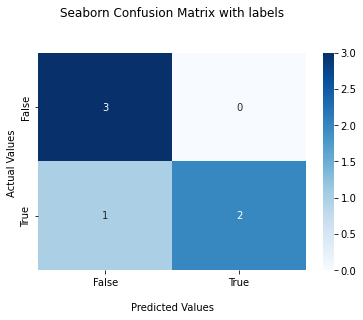

In [91]:
arr1 = np.array([0,1,0,1,1,0])
arr2 = np.array([0,1,0,1,0,0])
assert calc_tp(arr1, arr2) == 2, 'wrong tp'
assert calc_fp(arr1, arr2) == 0, 'wrong fp'
assert calc_tn(arr1, arr2) == 3, 'wrong tn'
assert calc_fn(arr1, arr2) == 1, 'wrong fn'
assert np.all(calc_confusion_matrix(arr1, arr2) == np.array([[3, 0],[1, 2]])), 'wrong confusion matrix'
plot_confusion_matrix(arr1, arr2)

In [99]:
csv_valid = np.array(csv_valid, dtype=float)
y_true = csv_valid[:,1]
x_valid = csv_valid[:,:1]
y_pred = model.predict_proba(x_valid)[:,1]>0.645

In [115]:
def calculate_metrics(classifier, x, y):
    plt_arr1 = [[],[]]
    plt_arr2 = [[],[]]
    plt_arr3 = [[],[]]
    plt_arr4 = [[],[]]
    for treshold in range(1, 1000):
        i = treshold/1000
        y_pred = classifier.predict_proba(x)[:,1]>i
        plt_arr1[0].append(i)
        plt_arr1[1].append(calc_precision(y, y_pred))
        plt_arr2[0].append(i)
        plt_arr2[1].append(calc_recall(y, y_pred))
        plt_arr3[0].append(i)
        plt_arr3[1].append(calc_f1_measure(y, y_pred))
        plt_arr4[0].append(i)
        plt_arr4[1].append(calc_accuracy(y, y_pred))
    return plt_arr1, plt_arr2, plt_arr3, plt_arr4

In [117]:
def plot_metrics(model, x_valid, y_true):
    plt.figure()
    plt_a1, plt_a2, plt_a3, plt_a4 = calculate_metrics(model, x_valid, y_true)
    plt.plot(plt_a1[0], plt_a1[1], label="precision")
    plt.plot(plt_a2[0], plt_a2[1], label="recall")
    plt.plot(plt_a3[0], plt_a3[1], label="f1")
    for x in range(len(plt_a2[1])):
        if plt_a2[1][x] == 1:
            plt.scatter([plt_a2[0][x]], [1], label="best")
            print(x)
            break
    mn, mn_t = 0, 0
    for x in range(len(plt_a1[1])):
        if plt_a1[1][x] > mn:
            mn = plt_a1[1][x]
            mn_t = plt_a1[0][x]

    plt.scatter([mn_t], [mn], label='best1')
    plt.legend(loc="upper right")
    plt.figure()
    plt.plot(plt_a4[0], plt_a4[1], label="accuracy")
    plt.legend(loc="upper right")


0


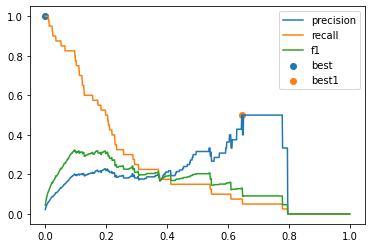

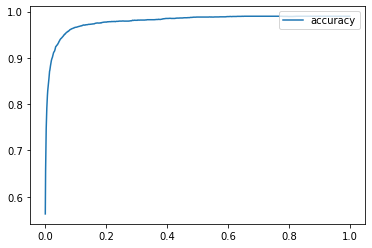

In [119]:
plot_metrics(model, x_valid, y_true)

In [118]:
print(f"Treshold for max precision: {mn_t}")

Treshold for max precision: 0.645


In [101]:
print(calc_precision(y_true, y_pred))
print(calc_recall(y_true, y_pred))
print(calc_f1_measure(y_true, y_pred))
print(calc_accuracy(y_true, y_pred))

0.5
0.075
0.13043478260869565
0.99


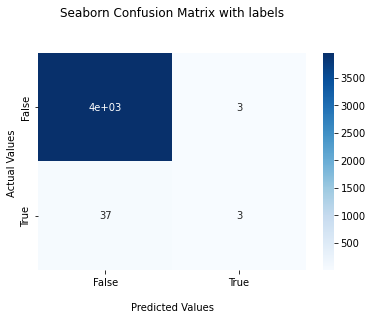

In [100]:
plot_confusion_matrix(y_true, y_pred)

# Quadratic classifier

In [107]:
x_train[:10]

array([[-0.79593338],
       [-1.40361187],
       [ 0.14820879],
       [ 0.35935325],
       [ 2.4435956 ],
       [ 0.463485  ],
       [-0.62839084],
       [-0.09880818],
       [-0.32727812],
       [-0.20031281]])

In [108]:
x_quad_train = get_quadratic_features(x_train)

In [110]:
quad_model = SGDClassifier(loss='log')

In [112]:
quad_model.fit(x_quad_train, y_train)

SGDClassifier(loss='log')

0


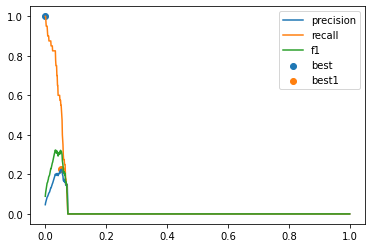

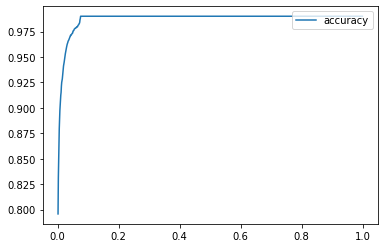

In [127]:
plot_metrics(quad_model, get_quadratic_features(x_valid), y_true)

In [125]:
quad_arr = quad_model.predict_proba(get_quadratic_features(x_valid))[:,1]>0.05

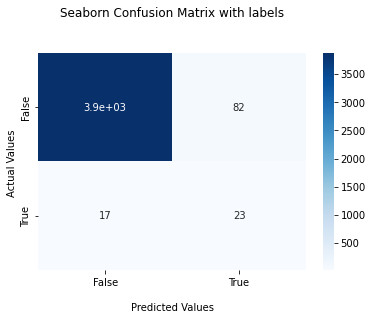

In [126]:
plot_confusion_matrix(y_true, quad_arr)

0


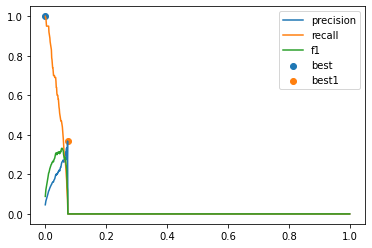

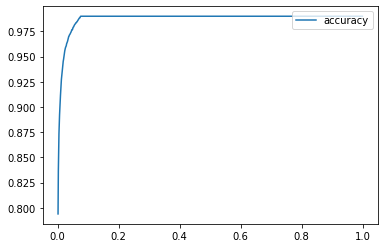

In [128]:
plot_metrics(quad_model, x_quad_train, y_train)

0


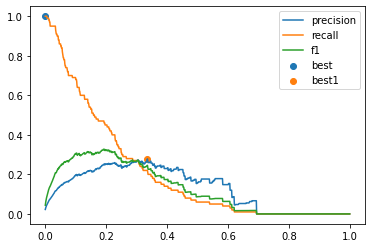

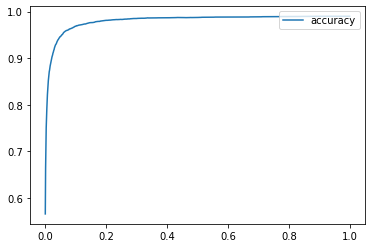

In [129]:
plot_metrics(model, x_train, y_train)